In [1]:
# Required libraries and modules
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras import backend as K
import cv2


In [2]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

np.random.seed(1234)

x_train = x_train / 255.0
x_test = x_test / 255.0

# Function to add Gaussian noise
import numpy as np
from numpy.random import default_rng
import cv2

def add_gaussian_noise(image, var, sigma):
    row, col = image.shape
    mean = 0
    var = var
    sigma = sigma
    gauss = np.random.normal(mean, sigma, (row, col))
    gauss = gauss.reshape(row, col)
    noisy = image + gauss
    return noisy

def is_within_bounds(x, y, w, h):
    """Check if a point is within certain bounds"""
    return 0 <= x < w and 0 <= y < h

def bresenham_line(start, end, thickness, bounds=(28,28)):
    """Generate points along a line using Bresenham's line algorithm"""
    x1, y1 = start
    x2, y2 = end
    points = []
    dx = abs(x2 - x1)
    dy = abs(y2 - y1)
    x, y = x1, y1
    sx = -1 if x1 > x2 else 1
    sy = -1 if y1 > y2 else 1
    if dx > dy:
        err = dx / 2.0
        while x != x2:
            for i in range(thickness+1):
                if bounds:
                    w, h = bounds
                    if is_within_bounds(x, y+i, w, h):
                        points.append((x, y+i))
                else:
                    points.append((x, y+i))
            err -= dy
            if err < 0:
                y += sy
                err += dx
            x += sx
    else:
        err = dy / 2.0
        while y != y2:
            for i in range(thickness+1):
                if bounds:
                    w, h = bounds
                    if is_within_bounds(x+i, y, w, h):
                        points.append((x+i, y))
                else:
                    points.append((x+i, y))
            err -= dx
            if err < 0:
                x += sx
                err += dy
            y += sy        
    points.append((x, y))
    return points

def add_random_ellipses(image, ellipse_count, upper_boundary):
    # Create a copy of the image to avoid altering the original
    image = image.copy()

    # Get the image dimensions
    height, width = image.shape

    for _ in range(ellipse_count):
        # Pick a random center for the ellipse
        center_x = np.random.randint(0, width)
        center_y = np.random.randint(0, height)

        # Pick random semi-axes for the ellipse, ensuring they're at least 1 and at most upper_boundary
        axis_x = np.random.randint(1, upper_boundary+1)
        axis_y = np.random.randint(1, upper_boundary+1)

        # Pick a random angle for the ellipse
        angle = np.random.uniform(0, 360)

        # Draw a white ellipse at the selected location
        cv2.ellipse(image, (center_x, center_y), (axis_x, axis_y), angle, 0, 360, (1,), thickness=-1)  # -1 thickness means the ellipse is filled

    return image


def add_random_lines(image, num_lines=1):
    # MNIST images are 28x28 pixels
    h, w = image.shape

    # Create a copy of the image to draw lines on
    image_with_lines = image.copy()

    for zahl in range(num_lines):
        # Randomly generate line parameters
        start_point_white= (np.random.randint(0, w), np.random.randint(0, h))
        end_point_white= (np.random.randint(0, w*0.5), np.random.randint(0, h*0.5))

        start_point_black = (np.random.randint(0, w), np.random.randint(0, h))
        end_point_black = (np.random.randint(0, w*0.5), np.random.randint(0, h*0.5))
        
        # Get points along the line
        if(zahl==1):
            points_white = bresenham_line(start_point_white, end_point_white,thickness=1)
            # Set the value at each point to 1 (white)
            for point in points_white:
                x, y = point
                image_with_lines[y, x] = 1
        
        points_black = bresenham_line(start_point_black, end_point_black,thickness=2)    
        # Set the value at each point to 0 (black)
        for point in points_black:
            x, y = point
            image_with_lines[y, x] = 0

    return image_with_lines

# Initialize random number generator
rng = default_rng()

# Select random indices from the training set
#random_indices_train = rng.choice(len(x_train), size=len(x_train)//2, replace=False)
random_indices_train = rng.choice(len(x_train), size=len(x_train), replace=False)

# Select random indices from the test set
#random_indices_test = rng.choice(len(x_test), size=len(x_test)//2, replace=False)
random_indices_test = rng.choice(len(x_test), size=len(x_test), replace=False)

# Apply Gaussian noise and random lines only to randomly selected images in training set
for i in random_indices_train:
    x_train[i] = add_random_lines(x_train[i],2)
    x_train[i] = add_random_ellipses(x_train[i],3, 3)
    #x_train[i] = add_gaussian_noise(x_train[i], 2, 0.03)

# Apply Gaussian noise and random lines only to randomly selected images in test set
for i in random_indices_test:
    x_test[i] = add_random_lines(x_test[i],2)
    x_test[i] = add_random_ellipses(x_test[i],3, 3)
    #x_test[i] = add_gaussian_noise(x_test[i], 2, 0.03)

# One-hot Encoding
y_train = to_categorical(y_train, 10) # 0-9
y_test = to_categorical(y_test, 10)
print(y_train.shape) #output vector ist ein vector mit 10 werten alle 0 oder 1


(60000, 10)


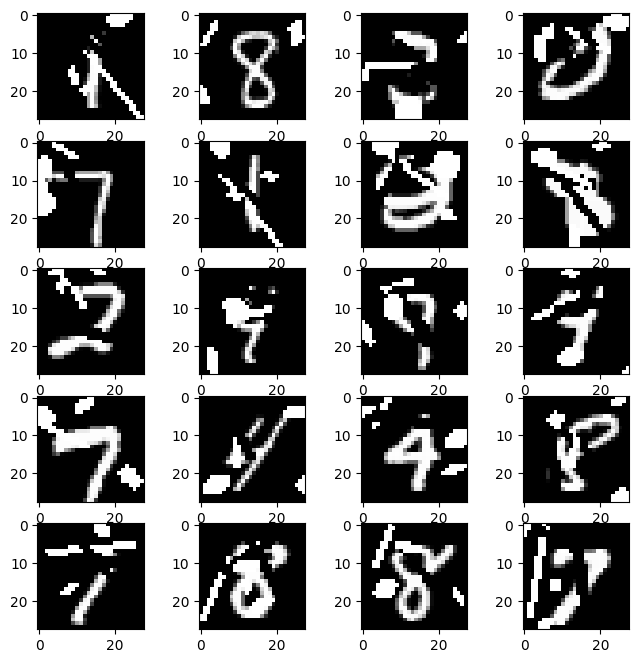

In [3]:
import matplotlib.pyplot as plt

w = 10
h = 10
fig = plt.figure(figsize=(8, 8))
columns = 4
rows = 5
num_images = x_train.shape[0]  # assuming x_train is a numpy array
num_samples = columns*rows
random_indices_train = np.random.choice(num_images, num_samples, replace=False)  # Generate random indices

for i in range(1, num_samples +1):
    img = x_train[random_indices_train[i-1]]
    ax = fig.add_subplot(rows, columns, i)
    ax.imshow(img, cmap='gray')
plt.show()



In [4]:
# earlystopping = callbacks.EarlyStopping(monitor="val_loss",
#                                         mode="min", patience=5,
#                                         restore_best_weights=True)

#Drop outs möglich nach RELU (Linearer  linear projections.) and Dense Layers

# Define the model
# model = Sequential()
# model.add(Flatten(input_shape=(28, 28)))
# model.add(Dense(100, activation='relu'))
# model.add(Dense(10, activation='softmax'))
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(150, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(69, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

from keras.callbacks import EarlyStopping
# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# Train the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, callbacks=[early_stopping])
model.save('hardcore_model.h5')


Epoch 1/5
1875/1875 [==============================] - 30s 15ms/step - loss: 0.7825 - accuracy: 0.7395 - val_loss: 0.3415 - val_accuracy: 0.8900
Epoch 2/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.4646 - accuracy: 0.8454 - val_loss: 0.2808 - val_accuracy: 0.9067
Epoch 3/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.3921 - accuracy: 0.8706 - val_loss: 0.2463 - val_accuracy: 0.9180
Epoch 4/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.3429 - accuracy: 0.8874 - val_loss: 0.2141 - val_accuracy: 0.9283
Epoch 5/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.3174 - accuracy: 0.8942 - val_loss: 0.2012 - val_accuracy: 0.9326


In [5]:
from keras.models import load_model
model = load_model('hardcore_model.h5')
# retrain for higher accuracy
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, callbacks=[early_stopping])

Epoch 1/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2936 - accuracy: 0.9017 - val_loss: 0.1918 - val_accuracy: 0.9364
Epoch 2/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2795 - accuracy: 0.9067 - val_loss: 0.1763 - val_accuracy: 0.9400
Epoch 3/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2590 - accuracy: 0.9149 - val_loss: 0.1741 - val_accuracy: 0.9427
Epoch 4/5
1875/1875 [==============================] - 29s 16ms/step - loss: 0.2555 - accuracy: 0.9144 - val_loss: 0.1617 - val_accuracy: 0.9451
Epoch 5/5
1875/1875 [==============================] - 29s 16ms/step - loss: 0.2364 - accuracy: 0.9216 - val_loss: 0.1564 - val_accuracy: 0.9492


In [6]:
from sklearn.metrics import confusion_matrix, classification_report 
# Evaluate the model
# Make predictions
y_pred = model.predict(x_test)

# Convert predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Convert true labels to class labels
y_true_labels = np.argmax(y_test, axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)
cr = classification_report(y_true_labels, y_pred_labels)
# Print the confusion matrix
print("Confusion Matrix:")
print(cm)
print("classification_report:")
print(cr)

313/313 [==============================] - 1s 4ms/step
Confusion Matrix:
[[ 966    0    1    1    0    2    4    0    3    3]
 [   0 1119    3    7    1    0    3    1    0    1]
 [  12    1  980    8    1    0    5   11   13    1]
 [   2    2    2  965    0   22    0    4   11    2]
 [   0    5    4    0  905    0    2    7    2   57]
 [   5    0    1   18    0  851    8    0    6    3]
 [  19    2    3    2    4    7  915    0    5    1]
 [   1   14   10    0   14    0    0  946    2   41]
 [   9    3    9   23    1    7    3    6  901   12]
 [   6    4    2    8   13    8    0   21    3  944]]
classification_report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.97      0.99      0.98      1135
           2       0.97      0.95      0.96      1032
           3       0.94      0.96      0.95      1010
           4       0.96      0.92      0.94       982
           5       0.95      0.95      0.95     

In [7]:
# import matplotlib.pyplot as plt
# plt.imshow(x_train[2], cmap='gray')
# plt.colorbar(label='Grayscale Value (0-255)')
# plt.show()

In [8]:
model.save('hardcore_model.h5')

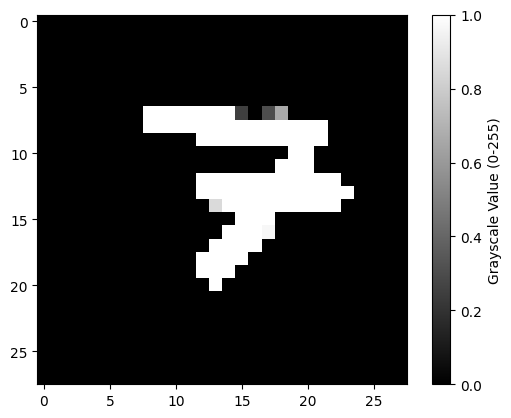

1/1 [==============================] - 0s 91ms/step
Highest Index: 7


In [9]:
from keras.utils import load_img, img_to_array


# Load the image
img = load_img('test_number.png', target_size=(28, 28), color_mode='grayscale')

# Convert the image to a numpy array and scale it
img = img_to_array(img)
img = img / 255.0


# Expand dimensions to match the shape that the model expects

plt.imshow(img, cmap='gray')
plt.colorbar(label='Grayscale Value (0-255)')
plt.show()

img = np.expand_dims(img, axis=0)
# Use the model to predict the digit
predictions = model.predict(img)

# The model gives probabilities for each digit, so take the digit with the highest probability
predicted_digit = np.argmax(predictions[0])
print('Highest Index:', predicted_digit)

In [10]:
import cv2
import numpy as np
from screeninfo import get_monitors
from keras.utils import load_img, img_to_array
from keras.models import load_model
import matplotlib.pyplot as plt

# Load the model
model = load_model('hardcore_model.h5')

# Open a handle to the webcam
webcam = cv2.VideoCapture(0)
cv2.namedWindow("Webcam", cv2.WINDOW_FREERATIO)
cv2.resizeWindow("Webcam",500,500)
while True:
    # Read a frame from the webcam
    ret, frame = webcam.read()

    if not ret:
        break

    # Convert the frame to grayscale
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    (T,frame) = cv2.threshold(frame, 25,255, cv2.THRESH_BINARY_INV)
    frame = cv2.resize(frame, (500, 500),interpolation=cv2.INTER_CUBIC)
    # Resize the frame to match the input size that the model expects
    frame = cv2.resize(frame, (28, 28),interpolation=cv2.INTER_CUBIC)

    frame = cv2.flip(frame,1)
    # Convert the frame to a Keras-compatible array, scale it to a range of 0 to 1, and ensure it's a float
    downscaled_frame = np.array(frame, dtype=np.float32) / 255.0
    
    #print(downscaled_frame)
    # Make a copy of the frame for displaying
    display_frame = downscaled_frame.copy()

    # Expand dimensions to match the shape that the model expects
    downscaled_frame = np.expand_dims(downscaled_frame, axis=0)
    #downscaled_frame = np.expand_dims(downscaled_frame, axis=-1) # to ensure the input shape matches model's expected shape

    # Use the model to predict the digit
    predictions = model.predict(downscaled_frame,verbose=False)

    # The model gives probabilities for each digit, so take the digit with the highest probability
    predicted_digit = np.argmax(predictions[0])
    print('Predicted digit:', predicted_digit)
    
    # Display the modified frame
    cv2.imshow('Webcam', cv2.flip(display_frame,1))

    # If the 'q' key is pressed, break the loop
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and destroy all windows
webcam.release()
cv2.destroyAllWindows()
